## **Bruno Andrade Schiavone 2142546**
## **Pedro Bernardi Alves 1914618**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1) Carregamento da base dados

In [2]:
df=pd.read_csv('hotel-reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [6]:
df.shape

(36275, 19)

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [9]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

## 2) Pré-processamento

In [10]:
df.drop(['Booking_ID'],axis=1, inplace=True)

In [11]:
df.select_dtypes(include='object').nunique()

type_of_meal_plan      4
room_type_reserved     7
market_segment_type    5
booking_status         2
dtype: int64

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder = LabelEncoder()
df["booking_status"] = labelencoder.fit_transform(df["booking_status"])

In [15]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [16]:
df = pd.get_dummies(df, columns=['market_segment_type', 'room_type_reserved', 'type_of_meal_plan'])

In [17]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,True,False,False,False
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,True,False,False,False
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,True,False,False,False
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,False,False,True,False,False,False,True,False,False,False
36271,2,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,True,False,False,False
36272,2,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,True,False,False,False
36273,2,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,False,False,False,True


In [18]:
cols_to_drop = ['arrival_date', 'arrival_year']
df.drop(cols_to_drop,axis=1, inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,2,0,1,2,0,224,10,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,2,0,2,3,0,5,11,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,2,0,0,2,0,211,5,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,2,0,1,1,0,48,4,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,8,0,0,0,...,False,False,True,False,False,False,True,False,False,False
36271,2,0,1,3,0,228,10,0,0,0,...,False,False,False,False,False,False,True,False,False,False
36272,2,0,2,6,0,148,7,0,0,0,...,False,False,False,False,False,False,True,False,False,False
36273,2,0,0,3,0,63,4,0,0,0,...,False,False,False,False,False,False,False,False,False,True


### Normalização dos dados

In [19]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
required_car_parking_space                 2
lead_time                                352
arrival_month                             12
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
market_segment_type_Aviation               2
market_segment_type_Complementary          2
market_segment_type_Corporate              2
market_segment_type_Offline                2
market_segment_type_Online                 2
room_type_reserved_Room_Type 1             2
room_type_reserved_Room_Type 2             2
room_type_reserved_Room_Type 3             2
room_type_reserved_Room_Type 4             2
room_type_

In [20]:
std=StandardScaler()

#columns = ['lead_time','avg_price_per_room']
columns = ['lead_time','avg_price_per_room', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
df[columns] = \
std.fit_transform(df[columns])

In [21]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,0.839242,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,True,False,False,False
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,1.164990,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,False,False,False,True
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,-1.766747,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,True,False,False,False
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,-0.789501,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,True,False,False,False
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,-1.115250,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,-0.26147,1.365993,2.690296,-0.178819,-0.002706,0.187744,-0.16221,-0.063393,-0.087456,...,False,False,True,False,False,False,True,False,False,False
36271,0.298893,-0.26147,0.217401,0.563972,-0.178819,1.661446,0.839242,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,True,False,False,False
36272,0.298893,-0.26147,1.365993,2.690296,-0.178819,0.730452,-0.138004,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,True,False,False,False
36273,0.298893,-0.26147,-0.931190,0.563972,-0.178819,-0.258730,-1.115250,-0.16221,-0.063393,-0.087456,...,False,False,False,False,False,False,False,False,False,True


In [22]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,36275.000000
mean,4.270112e-17,1.518044e-17,9.950536e-17,-1.165466e-16,3.917534e-17,6.463931e-17,1.436266e-16,1.704127e-17,1.008765e-17,-3.094852e-17,-7.051561e-17,1.664952e-17,0.672364
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.469358
min,-3.556844e+00,-2.614704e-01,-9.311902e-01,-1.562353e+00,-1.788193e-01,-9.918878e-01,-2.092496e+00,-1.622099e-01,-6.339327e-02,-8.745646e-02,-2.947468e+00,-7.881400e-01,0.000000
25%,2.988926e-01,-2.614704e-01,-9.311902e-01,-8.535778e-01,-1.788193e-01,-7.940515e-01,-7.895014e-01,-1.622099e-01,-6.339327e-02,-8.745646e-02,-6.589979e-01,-7.881400e-01,0.000000
50%,2.988926e-01,-2.614704e-01,2.174012e-01,-1.448030e-01,-1.788193e-01,-3.285544e-01,1.877443e-01,-1.622099e-01,-6.339327e-02,-8.745646e-02,-1.132419e-01,-7.881400e-01,1.000000
75%,2.988926e-01,-2.614704e-01,1.365993e+00,5.639718e-01,-1.788193e-01,4.744282e-01,8.392415e-01,-1.622099e-01,-6.339327e-02,-8.745646e-02,4.724127e-01,4.837605e-01,1.000000
max,4.154629e+00,2.457446e+01,7.108950e+00,1.048682e+01,5.592239e+00,4.163493e+00,1.490739e+00,6.164850e+00,3.523139e+01,3.297706e+01,1.244200e+01,5.571362e+00,1.000000


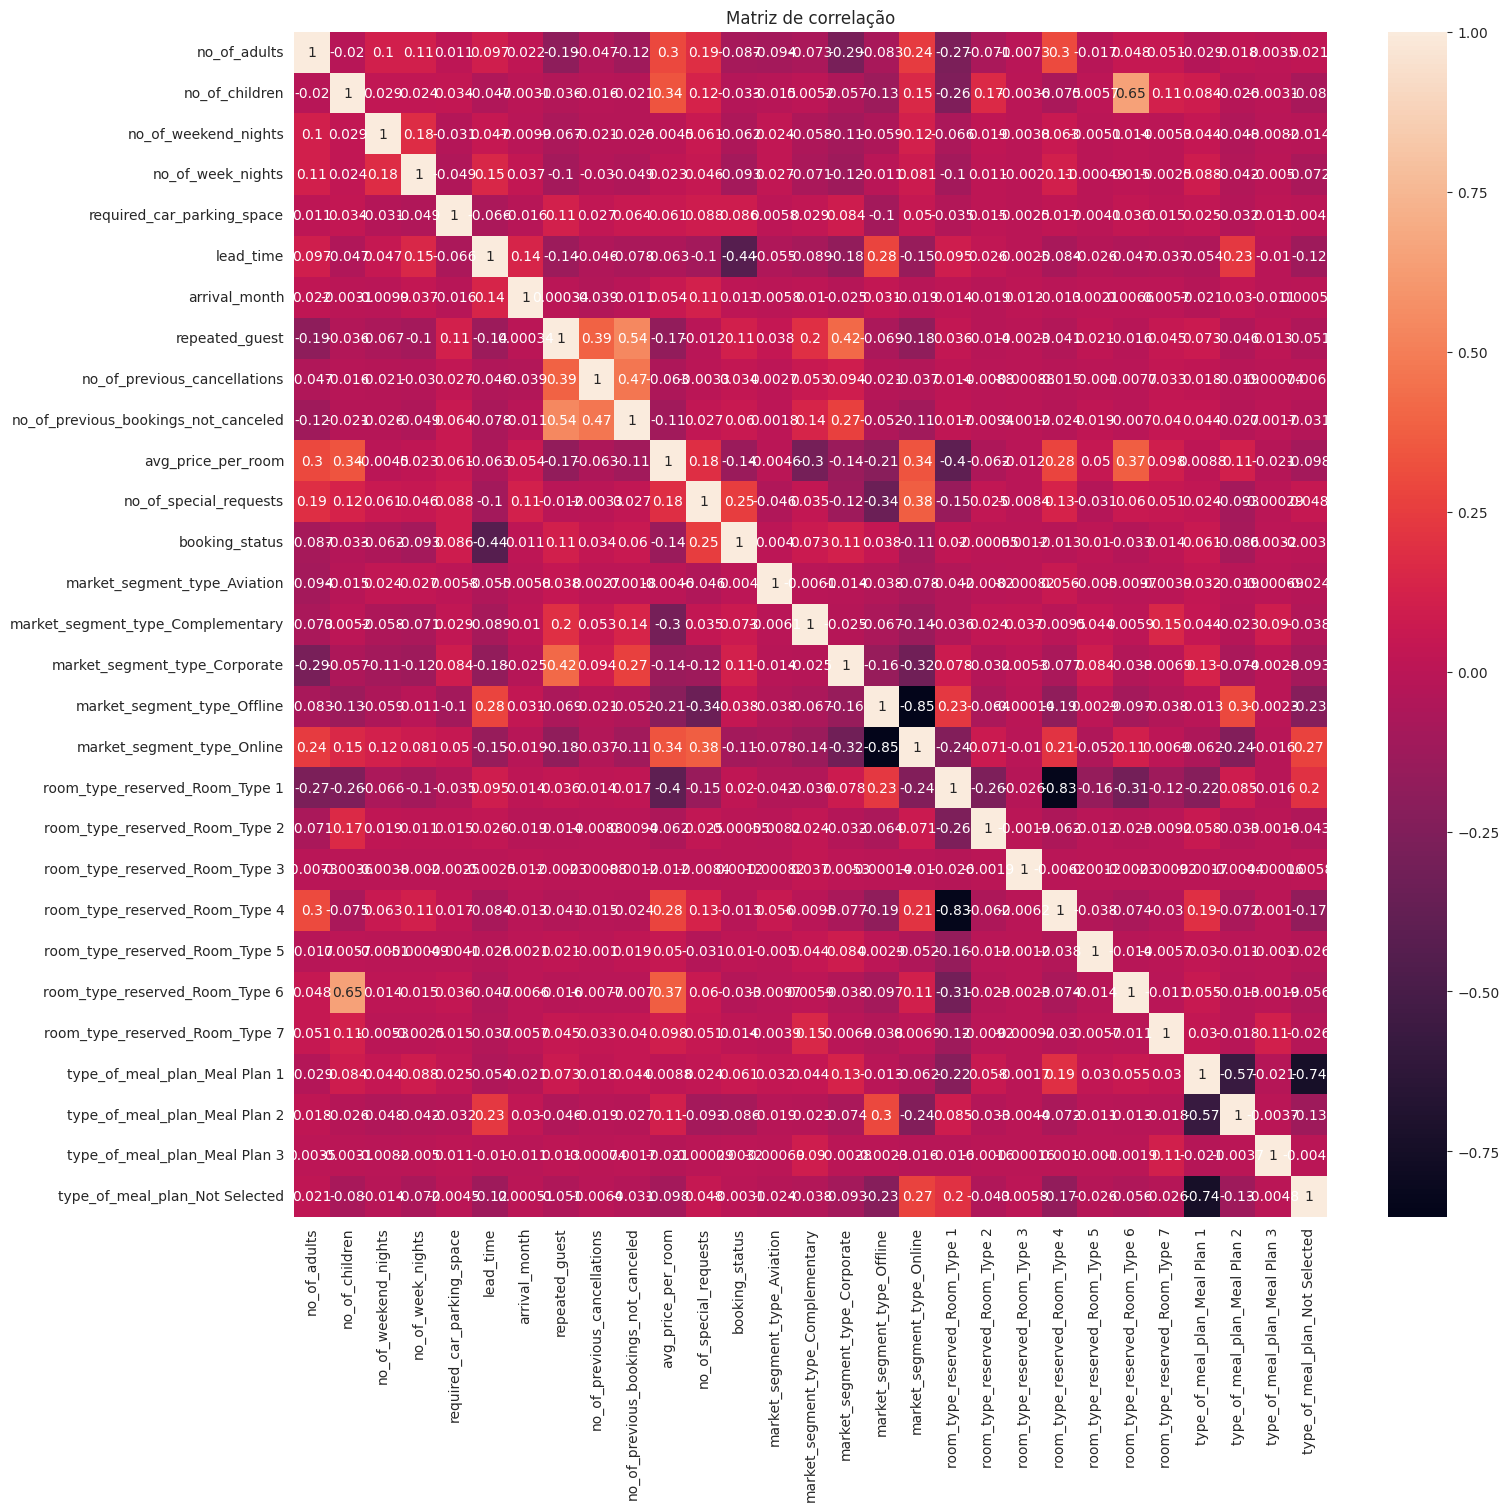

In [23]:
cor=df.corr()
plt.figure(figsize=(15,15),layout='constrained')
plt.title('Matriz de correlação')
sns.heatmap(cor,annot=True)
plt.show()

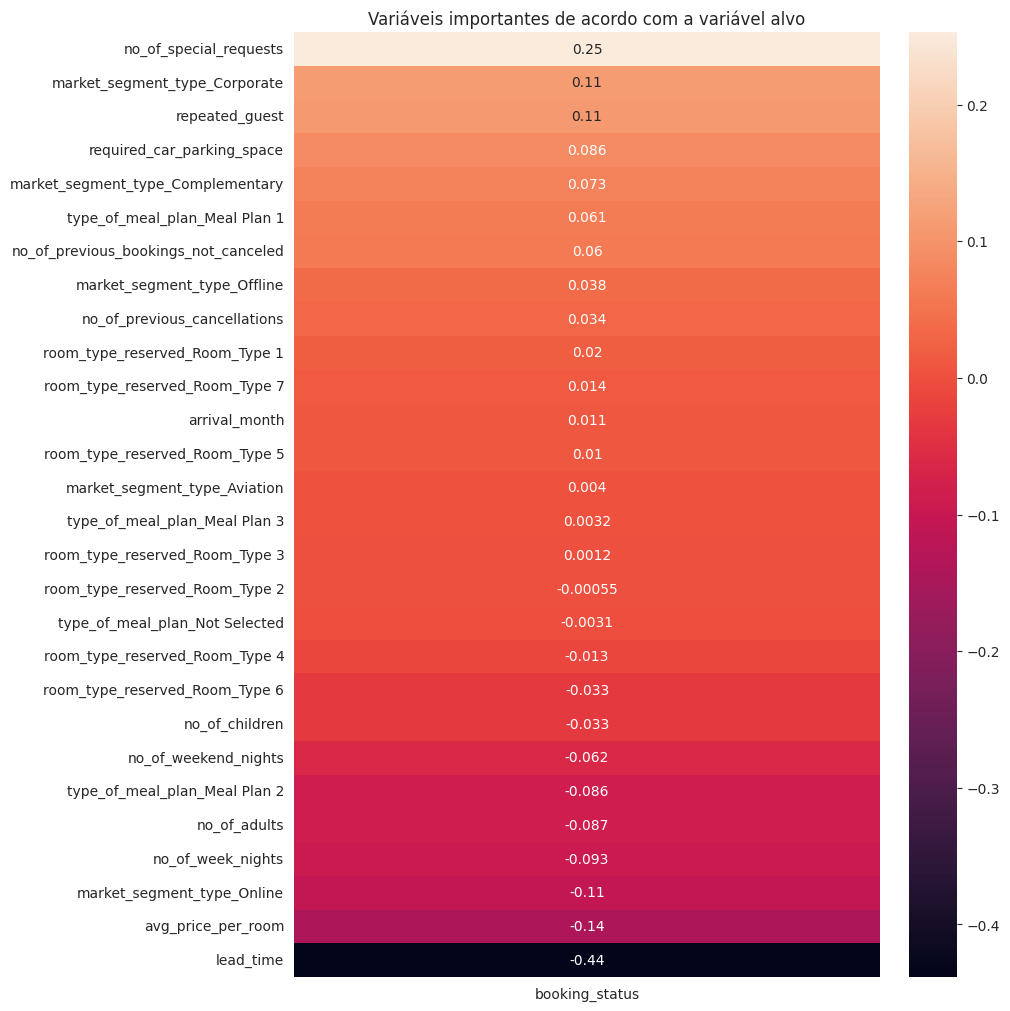

In [24]:
cor=df.corr()
target=cor['booking_status'].drop('booking_status')
target_s=target.sort_values(ascending=False)
plt.figure(figsize=(10,10),layout='constrained')
plt.title('Variáveis importantes de acordo com a variável alvo')
sns.heatmap(target_s.to_frame(),annot=True)
plt.show()

## 3) Algoritmos de Classificação
* Árvore de Decisão
* KNN

In [25]:
X = df.drop(['booking_status'], axis=1).values
y = df['booking_status'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Decision Tree

In [27]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

DT_score = DT.score(X_train, y_train)
DT_test = DT.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',DT_score)
print('Testing Score \n',DT_test)
print(cm)

Training Score 0.9944076874606175
Testing Score 
 0.8639161995773225
[[2873  700]
 [ 781 6529]]


### KNN Classifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test, y_test)

cm = confusion_matrix(y_test,y_pred)
print('Training Score',train_score)
print('Testing Score \n',test_score)
print(cm)

Training Score 0.8953213610586012
Testing Score 
 0.8521547367453827
[[2700  873]
 [ 736 6574]]


## 4) validação cruzada

In [29]:
from sklearn.model_selection import StratifiedKFold

#### Decision Tree - Cross-Validation

In [30]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    DT.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(DT.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8737596471885336, 0.8715545755237045, 0.8685226019845645, 0.8652149944873209, 0.8743109151047409, 0.864902122966639, 0.8695891921698373, 0.8740005514199063, 0.8751033912324235, 0.8704163220292253]

Maior ACC: 87.51033912324235 %

Menor ACC: 86.4902122966639 %

Média ACC: 87.07374314106896 %

Desvio Padrão: 0.003699189460261697


#### KNN - Cross-Validation

In [31]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    knn.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8610804851157663, 0.8563947078280044, 0.847574421168688, 0.851433296582139, 0.8558434399117971, 0.8566308243727598, 0.8560794044665012, 0.8646264130135098, 0.8582850840915357, 0.8569065343258891]

Maior ACC: 86.46264130135098 %

Menor ACC: 84.7574421168688 %

Média ACC: 85.64854610876591 %

Desvio Padrão: 0.004670744981536075


## 5) Balanceamento das classes

In [32]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

#### Decision Tree - Balanceamento e Validação Cruzada

In [34]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    DT.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(DT.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8679713340683572, 0.8599779492833517, 0.8701764057331863, 0.8668687982359427, 0.8687982359426681, 0.8654535428728977, 0.8637992831541219, 0.8665563826854149, 0.8734491315136477, 0.8687620623104494]

Maior ACC: 87.34491315136476 %

Menor ACC: 85.99779492833517 %

Média ACC: 86.71813125800037 %

Desvio Padrão: 0.0036635356112572964


#### KNN - Balanceamento e Validação Cruzada

In [35]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    sm = SMOTE()
    x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train_fold, y_train_fold)
    knn.fit(x_train_oversampled, y_train_oversampled)
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))

# Print the output.
print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8409592061742006, 0.8382028665931642, 0.8302094818081588, 0.8365490628445424, 0.8431642778390298, 0.8365039977943204, 0.8367797077474497, 0.8458781362007168, 0.8315412186379928, 0.8398125172318721]

Maior ACC: 84.58781362007169 %

Menor ACC: 83.02094818081588 %

Média ACC: 83.79600472871448 %

Desvio Padrão: 0.004819433956443862
